Уровень 0. Задание 1

In [1]:
import numpy as np

In [12]:
trials = 15
orel = 0

for i in range(trials):
    random_score = np.random.randint(0, 2)
    if random_score == 1:
        orel += 1
        
p = orel / trials
print(p)

0.5333333333333333


Задание 2

In [13]:
from scipy.stats import *

In [14]:
sv = np.random.randint(low = 1, high = 10, size = 10)
sv

array([4, 3, 7, 2, 6, 7, 1, 1, 1, 3])

In [15]:
sampling_data = np.random.choice(sv, size=1000)

In [17]:
import seaborn as sns

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Data_values'), Text(0, 0.5, 'Frequency')]

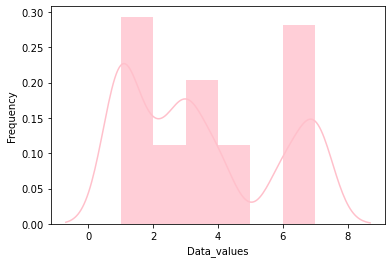

In [23]:
ax=sns.distplot(sampling_data,
kde=True,
color='pink',
hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Data_values',ylabel='Frequency')

In [24]:
print(f'среднее арифметическое равно {np.mean(sampling_data)}')
print(f'медиана равна {np.median(sampling_data)}')
print(f'дисперсия равна {np.var(sampling_data)}')

среднее арифметическое равно 3.441
медиана равна 3.0
дисперсия равна 5.024519000000001


Уровень 1. Задание 3

In [26]:
import pandas as pd

In [27]:
df = pd.DataFrame({'M1':[0,0,0,0,1,1,1,1],
                  'M2':[0,0,1,1,0,0,1,1],
                  'M3':[0,1,0,1,0,1,0,1]})
df

,M1,M2,M3
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [28]:
df.loc[df.M1==df.M2, 'A1'] = True # монеты 1 и 2 упали одной стороной -> исход, благоприятный для А1
df.loc[df.M2==df.M3, 'A2'] = True # аналогично для А2
df.loc[df.M1==df.M3, 'A3'] = True # аналогично для А3
df.fillna(False, inplace=True)
df

,M1,M2,M3,A1,A2,A3
0,0,0,0,True,True,True
1,0,0,1,True,False,False
2,0,1,0,False,False,True
3,0,1,1,False,True,False
4,1,0,0,False,True,False
5,1,0,1,False,False,True
6,1,1,0,True,False,False
7,1,1,1,True,True,True


Пересечение событий А1 и А2 указывает на то, что первая и вторая монеты упали одной стороной и одновременно вторая и третья монеты упали одной стороной, то есть все три монеты упали одной стороной одновременно.

У нас есть 2 таких исхода из 8, соотвественно Р(А1А2) = 2/8 = 1/4
Подставим значения вероятностей в нашу формулу $P(A1A2) = P(A1)*P(A2)$ и получим:
$1/4 = 1/2 * 1/2$

Аналогично получим $P(А2А1) = P(A2)*P(A1)$ и это означает, что А1 и А2 попарно независимые. Аналогично доказывается, что попарно независимы А2 и А3, А1 и А3.

Рассмотрим одновременное наступление событий А1, А2 и А3 как пересечение (А1А2)
$P((A1A2)A3) = P(A1A2)*P(A3)$

Так как мы уже увидели, что $P(A1A2) = P(A1)*P(A2)$, спрведливо равенство:

$P((A1A2)A3) = P(A1)*P(A2)*P(A3)$

Одновременное наступление всех 3х событий означает, что все монеты выпали либо орлом, либо решкой, т.е. вероятность P((A1A2)A3) = 2/8 = 1/4

Каждая из вероятностей P(Ai) = 4/8 = 1/2

Подставим в формулу, получим, что:

$1/4 = 1/2 * 1/2 * 1/2$

Все 3 события в совокупности зависимы.
Одновременное выполнение событий А1 и А2 уже гарантирует, что все монеты выпадут одной стороной, т.е. событие А3 в любом случае будет выполнено.

Задание 4

In [44]:
A1 = 0.2 #продукция первого предприятия
A2 = 0.3 #продукция второго предприятия
A3 = 0.5 #продукция третьего предприятия
p_A1 = 0.1 #вероятность, что продукция окажется высшего сорта, если она взята из первого предприятия
p_A2 = 0.05 #вероятность, что продукция окажется высшего сорта, если она взята из второго предприятия
p_A3 = 0.2 #вероятность, что продукция окажется высшего сорта, если она взята из третьего предприятия
p_A = A1*p_A1 + A2*p_A2 + A3*p_A3
print(f'вероятность покупки продукции высшего сорта равна {p_A}')

вероятность покупки продукции высшего сорта равна 0.135
